In [2]:
''''
Description
Author: David Brin
First Created: 8/5/2024
Last Edited: 9/8/2024

This notebook is an analysis of the spiking activity of the cortical organoids from the 7/29/24 dataset.
The spiking activity is used to find active organoids in both spatial and temporal distribution. 
'''

"'\nDescription\nAuthor: David Brin\nFirst Created: 8/5/2024\nLast Edited: 9/8/2024\n\nThis notebook is an analysis of the spiking activity of the cortical organoids from the 7/29/24 dataset.\nThe spiking activity is used to find active organoids in both spatial and temporal distribution. \n"

In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import pickle as pkl

C:\Users\david\AppData\Local\Temp\ipykernel_21288\2529563799.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:


# Specify the path to your .mat file
mat_file_path = r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\lfp_psych_07-29-24\spk_processed\_spike_data.mat"

# Load the .mat file
mat_data = scipy.io.loadmat(mat_file_path)

# Display the keys in the .mat file to understand its structure
print(mat_data.keys())

# Access a specific variable from the .mat file
spike_times = mat_data.get('spike_times')
spike_waveforms = mat_data.get('spike_waveforms')

if spike_times is not None:
    spike_times_array = np.array(spike_times)
    print("Spike Times:", spike_times_array)

if spike_waveforms is not None:
    spike_waveforms_array = np.array(spike_waveforms)
    print("Spike Waveforms:", spike_waveforms_array)


dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])
Spike Times: [[[[array([[-3.8800000e-02,  1.3760000e-02,  3.7760000e-02, ...,
             5.9921800e+02,  5.9922448e+02,  5.9924184e+02]])
    array([], shape=(0, 0), dtype=uint8)
    array([[-3.8496000e-01, -2.1744000e-01, -2.4480000e-02, ...,
             5.9890416e+02,  5.9921032e+02,  5.9924344e+02]])
    array([[-2.9600000e-03,  1.2800000e-02,  2.0240000e-02, ...,
             5.9923984e+02,  5.9924272e+02,  5.9924704e+02]])   ]
   [array([], shape=(0, 0), dtype=uint8)
    array([[1.4960000e-01, 7.4096000e-01, 1.4767200e+00, 1.7376000e+00,
            2.0539200e+00, 3.3799200e+00, 4.8735200e+00, 7.3330400e+00,
            7.7279200e+00, 8.9608800e+00, 8.9923200e+00, 9.5641600e+00,
            1.3432720e+01, 1.3814720e+01, 1.3863840e+01, 1.4233280e+01,
            1.5814720e+01, 1.9529680e+01, 1.9574400e+01, 1.9681280e+01,
            2.1167280e+01, 2.1375280

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [3]:
len(spike_times_array[0][2][0][3][0])

11

In [4]:
spike_times_array[0][2][0][3][0][1]

26.91928

plot heatmap to **visualize** number of spikes per electrode (per well) 

**SPIKE ACTIVITY**

### Spacial Plotting

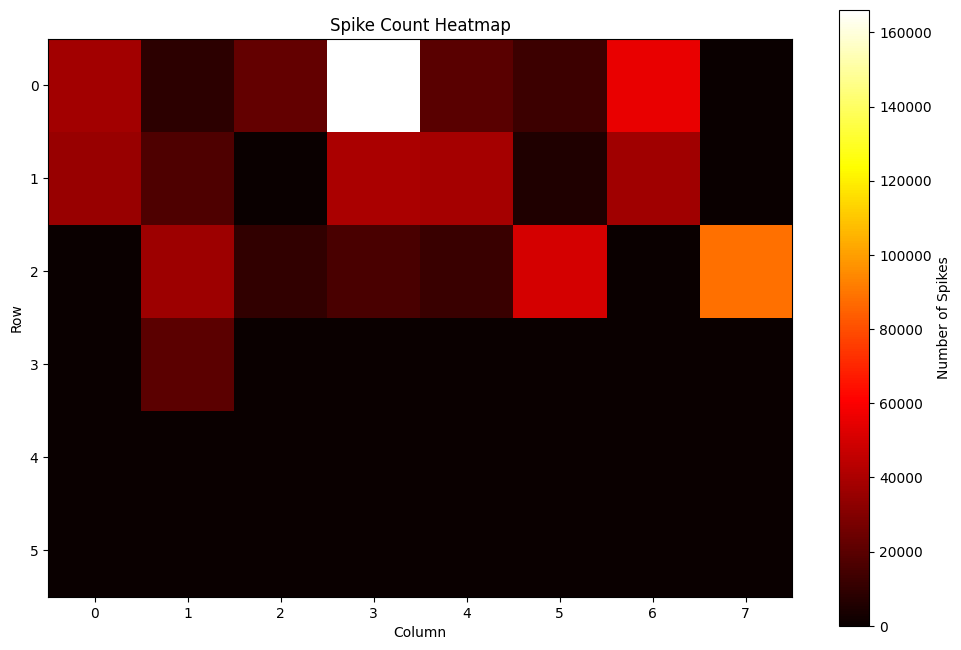

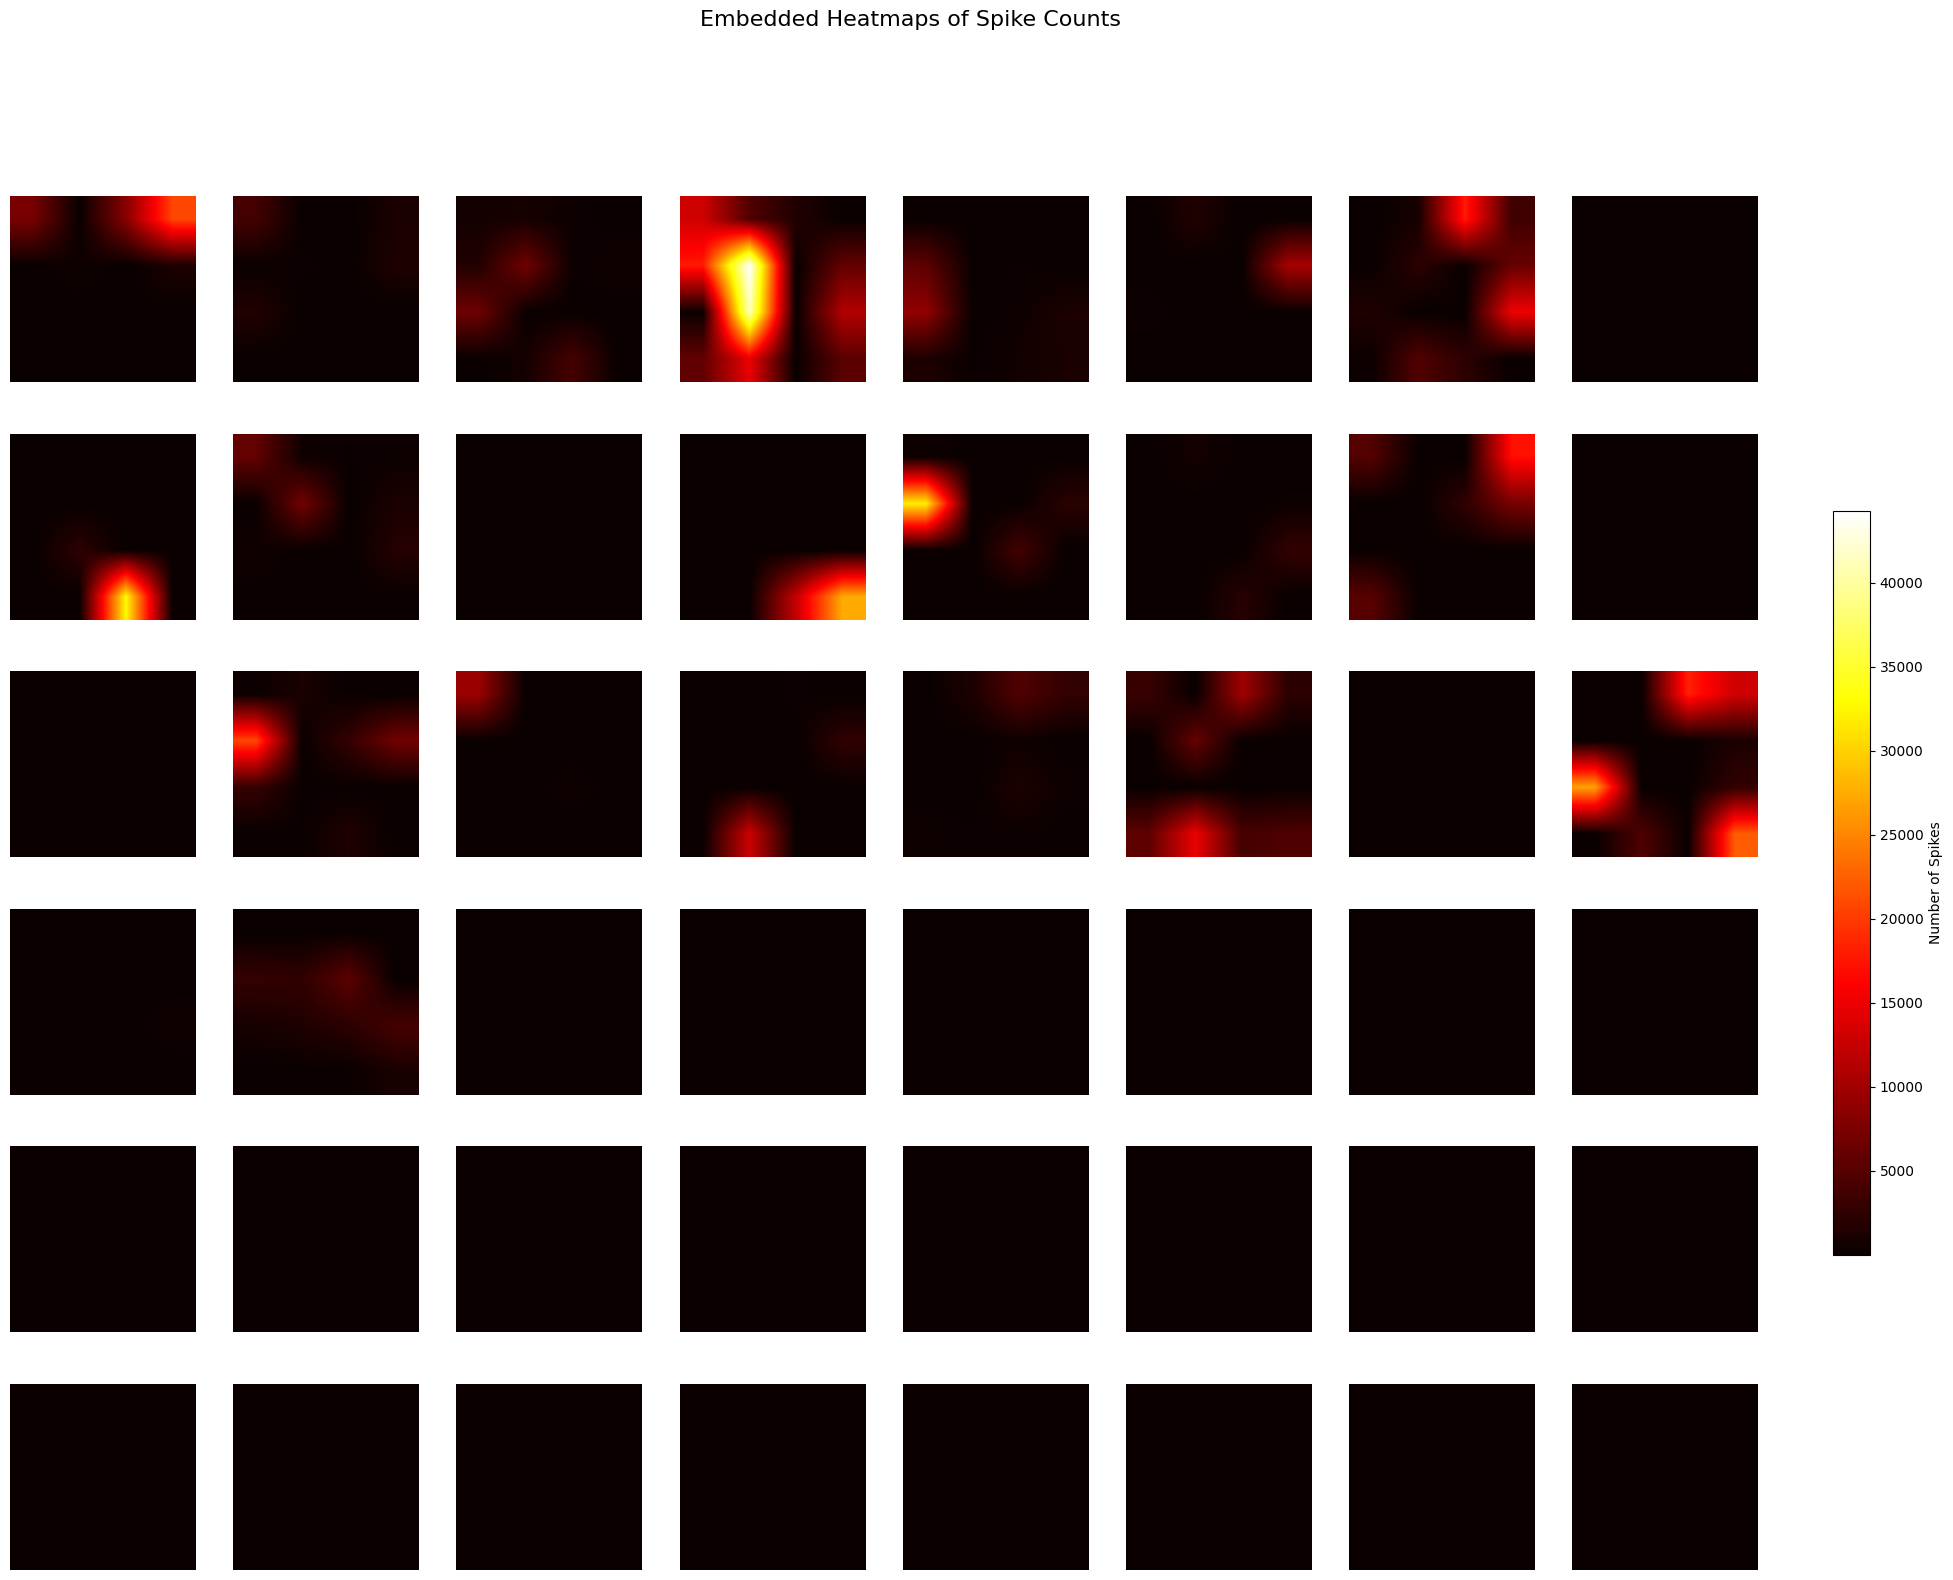

In [5]:
if spike_times_array is None:
    raise ValueError("Spike times data not found in the .mat file.")

# Initialize a 6x8 grid to store the sum of spikes in each 4x4 sub-grid
heatmap_data = np.zeros((6, 8))

# Loop through each well and electrode
for row in range(6):
    for col in range(8):
        # Initialize a 4x4 grid to store the number of spikes in each electrode
        sub_heatmap_data = np.zeros((4, 4))
        
        for i in range(4):
            for j in range(4):
                # Check if the electrode has data
                if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                    # Get the spike times for the electrode
                    spike_times = spike_times_array[row, col, i, j][0]
                    # Count the number of spikes and store in the sub-heatmap
                    sub_heatmap_data[i, j] = len(spike_times)

        # Sum the number of spikes in the 4x4 sub-grid and store in the main heatmap
        heatmap_data[row, col] = np.sum(sub_heatmap_data)

# Plot the 6x8 heatmap
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar(label='Number of Spikes')
plt.title('Spike Count Heatmap')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()


# Find the global min and max values for the subplots
global_min = np.inf
global_max = -np.inf

for row in range(6):
    for col in range(8):
        for i in range(4):
            for j in range(4):
                if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                    spike_times = spike_times_array[row, col, i, j][0]
                    count = len(spike_times)
                    if count < global_min:
                        global_min = count
                    if count > global_max:
                        global_max = count

# Plot each 4x4 sub-heatmap in its respective 6x8 position
fig, axarr = plt.subplots(6, 8, figsize=(24, 18))

for row in range(6):
    for col in range(8):
        # Initialize a 4x4 grid to store the number of spikes in each electrode
        sub_heatmap_data = np.zeros((4, 4))
        
        for i in range(4):
            for j in range(4):
                # Check if the electrode has data
                if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                    # Get the spike times for the electrode
                    spike_times = spike_times_array[row, col, i, j][0]
                    # Count the number of spikes and store in the sub-heatmap
                    sub_heatmap_data[i, j] = len(spike_times)
        
        # Plot the 4x4 sub-heatmap with unified scale
        im = axarr[row, col].imshow(sub_heatmap_data, cmap='hot', interpolation='bilinear', vmin=global_min, vmax=global_max)
        axarr[row, col].axis('off')

# Add a unified colorbar for the entire figure
cbar = fig.colorbar(im, ax=axarr.ravel().tolist(), orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Number of Spikes')

plt.suptitle('Embedded Heatmaps of Spike Counts', fontsize=16)
plt.show()

**ALL ELECTRODES WITH MORE THAN 20 SPIKES IN RECORDING**

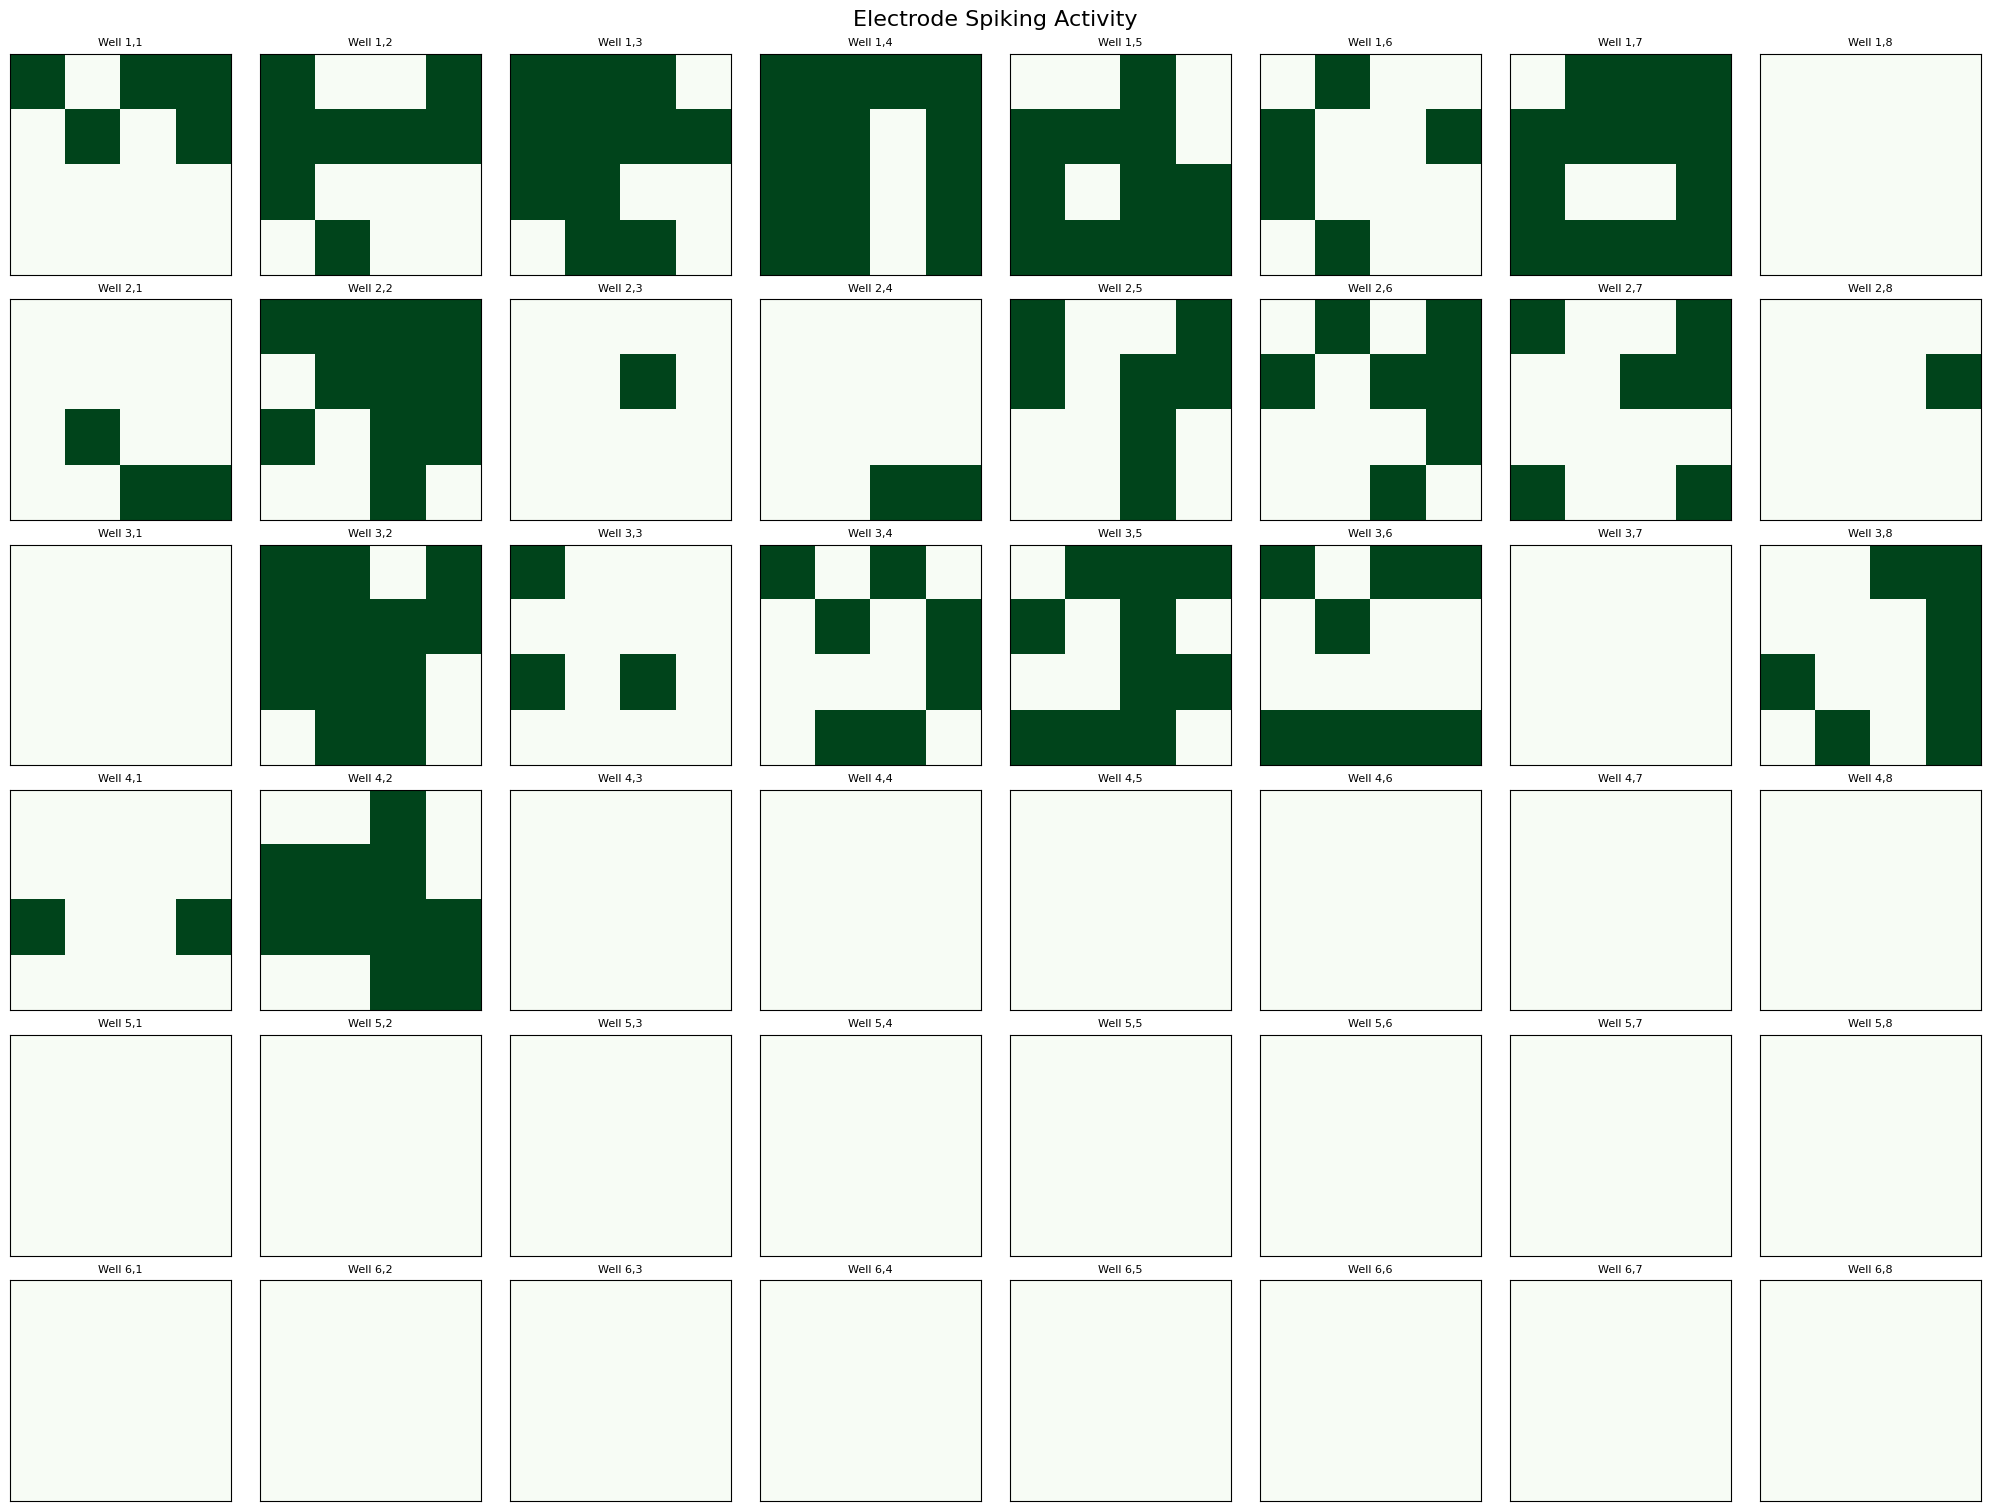

In [6]:
# Initialize a figure for the electrode activity plot
fig, axes = plt.subplots(6, 8, figsize=(20, 15), constrained_layout=True)

# Loop through each well and electrode to create subplots
for row in range(6):
    for col in range(8):
        # Initialize an array to store electrode activity (1 for > 20 spikes, 0 otherwise)
        electrode_activity = np.zeros((4, 4))
        for i in range(4):
            for j in range(4):
                # Check if the electrode has data and is not empty
                if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                    # Get the spike times for the electrode
                    spike_times = spike_times_array[row, col, i, j][0]
                    # Mark as active if the electrode has more than 20 spikes
                    if len(spike_times) > 20:
                        electrode_activity[i, j] = 1

        # Create a subplot for the current well
        ax = axes[row, col]
        ax.imshow(electrode_activity, cmap='Greens', vmin=0, vmax=1)

        # Customize the subplot appearance
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'Well {row+1},{col+1}', fontsize=8)

# Set overall plot title and show the plot
fig.suptitle('Electrode Spiking Activity', fontsize=16)
plt.show()

### Find Active Windows

In [7]:
def find_active_spike_windows(window_size):
    
    # Initialize a list to store spike counts and their positions
    spike_counts = []
    
    # Loop through each well and electrode
    for row in range(6):
        for col in range(8):
            for i in range(4):
                for j in range(4):
                    # Check if the electrode has data and is not empty
                    if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                        # Get the spike times for the electrode
                        spike_times = spike_times_array[row, col, i, j][0]
                        # Count the number of spikes and store with position
                        spike_counts.append((len(spike_times), (row, col, i, j)))
    
    # Sort electrodes by spike count and select the top 10
    spike_counts.sort(reverse=True, key=lambda x: x[0])
    top_10_electrodes = spike_counts[:10]
    
    # Find clusters of active time windows for top 10 electrodes
    active_time_windows = {}
    
    for count, (row, col, i, j) in top_10_electrodes:
        spike_times = spike_times_array[row, col, i, j][0]
        
        active_windows = []
    
        # Find clusters of spike times
        start_time = spike_times[0]
        end_time = start_time + window_size
        spike_count_in_window = 0
    
        for spike_time in spike_times:
            if spike_time <= end_time:
                spike_count_in_window += 1
            else:
                if spike_count_in_window > 100:  # Only consider windows with more than 100 spikes
                    active_windows.append((start_time, end_time, spike_count_in_window))
                start_time = spike_time
                end_time = start_time + window_size
                spike_count_in_window = 1
    
        # Add the last window if it has more than 100 spikes
        if spike_count_in_window > 100:
            active_windows.append((start_time, end_time, spike_count_in_window))
    
        active_time_windows[(row, col, i, j)] = active_windows
    
    # Display the positions and active time windows
    print(f"Top 10 Most Active Electrodes' Time Windows with >100 Spikes in {window_size}s:")
    for (row, col, i, j), windows in active_time_windows.items():
        if windows:  # Only print if there are active windows
            print(f"Electrode at Well ({row}, {col}), Sub-grid ({i}, {j}):")
            for start_time, end_time, count in windows:
                print(f"  Time Window: {start_time:.2f} - {end_time:.2f} s, Spike Count: {count}")
            print()
    
    # Plot a heatmap of the number of spikes in each 6x8 well for the top 10 electrodes
    heatmap_data = np.zeros((6, 8))
    
    for (row, col, _, _), windows in active_time_windows.items():
        if windows:
            heatmap_data[row, col] = sum(count for _, _, count in windows)
    
    plt.figure(figsize=(12, 8))
    plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Total Spike Count in Active Windows (Top 10 Electrodes)')
    plt.title('Heatmap of Active Wells (Top 10 Electrodes)')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

Top 10 Most Active Electrodes' Time Windows with >100 Spikes in 15s:
Electrode at Well (0, 3), Sub-grid (1, 1):
  Time Window: -1.25 - 13.75 s, Spike Count: 1103
  Time Window: 13.76 - 28.76 s, Spike Count: 967
  Time Window: 28.82 - 43.82 s, Spike Count: 1467
  Time Window: 43.82 - 58.82 s, Spike Count: 1233
  Time Window: 58.84 - 73.84 s, Spike Count: 1192
  Time Window: 73.84 - 88.84 s, Spike Count: 1039
  Time Window: 88.84 - 103.84 s, Spike Count: 993
  Time Window: 103.84 - 118.84 s, Spike Count: 935
  Time Window: 118.87 - 133.87 s, Spike Count: 1014
  Time Window: 133.87 - 148.87 s, Spike Count: 972
  Time Window: 148.92 - 163.92 s, Spike Count: 895
  Time Window: 163.98 - 178.98 s, Spike Count: 1105
  Time Window: 179.08 - 194.08 s, Spike Count: 1051
  Time Window: 194.09 - 209.09 s, Spike Count: 1066
  Time Window: 209.10 - 224.10 s, Spike Count: 911
  Time Window: 224.40 - 239.40 s, Spike Count: 936
  Time Window: 239.40 - 254.40 s, Spike Count: 845
  Time Window: 254.43 - 2

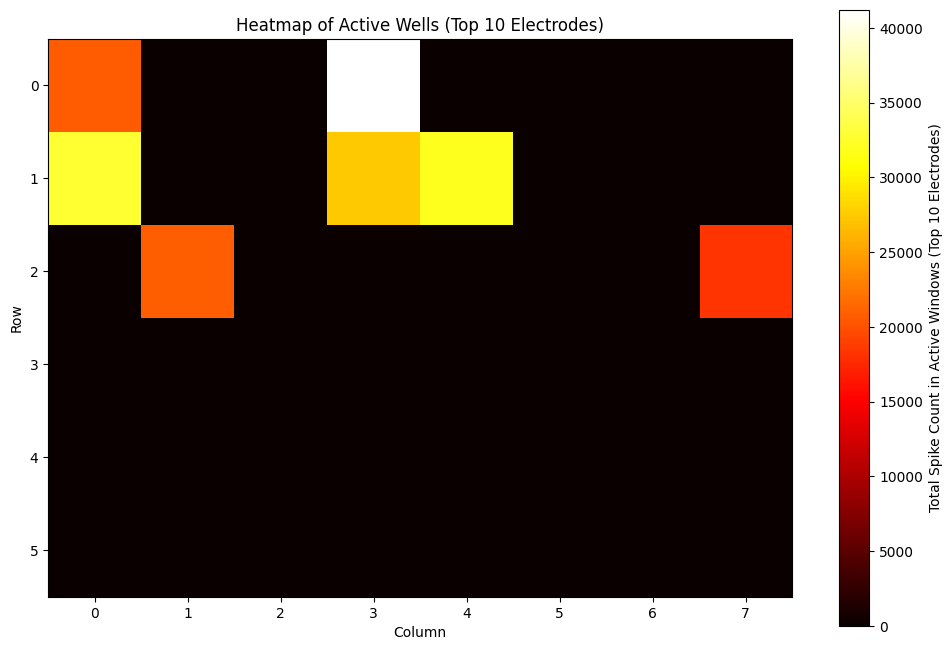

In [8]:
find_active_spike_windows(15)

In [9]:
def find_and_plot_10_active_spike_windows(window_size):
    # Initialize a list to store spike counts and their positions
    spike_counts = []
    
    # Loop through each well and electrode
    for row in range(6):
        for col in range(8):
            for i in range(4):
                for j in range(4):
                    # Check if the electrode has data and is not empty
                    if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                        # Get the spike times for the electrode
                        spike_times = spike_times_array[row, col, i, j][0]
                        # Count the number of spikes and store with position
                        spike_counts.append((len(spike_times), (row, col, i, j)))
    
    # Filter out electrodes with 0 spikes
    spike_counts = [sc for sc in spike_counts if sc[0] > 0]
    
    # Sort electrodes by spike count
    spike_counts.sort(reverse=True, key=lambda x: x[0])
    
    top_10_electrodes = spike_counts[:10]
    
    # Find clusters of active time windows for top 10 electrodes
    active_time_windows = {}
    
    for count, (row, col, i, j) in top_10_electrodes:
        spike_times = spike_times_array[row, col, i, j][0]
        
        active_windows = []
    
        # Find clusters of spike times
        start_time = spike_times[0]
        end_time = start_time + window_size
        spike_count_in_window = 0
    
        for spike_time in spike_times:
            if spike_time <= end_time:
                spike_count_in_window += 1
            else:
                active_windows.append((start_time, end_time, spike_count_in_window))
                start_time = spike_time
                end_time = start_time + window_size
                spike_count_in_window = 1
    
        # Add the last window
        active_windows.append((start_time, end_time, spike_count_in_window))
    
        active_time_windows[(row, col, i, j)] = active_windows
    
    # Plot the results
    fig, axes = plt.subplots(5, 2, figsize=(20,25))
    axes = axes.flatten()

    for idx, ((row, col, i, j), windows) in enumerate(active_time_windows.items()):
        window_starts = [start_time for start_time, end_time, count in windows]
        spike_counts = [count for start_time, end_time, count in windows]
        
        axes[idx].bar(window_starts, spike_counts, width=window_size, align='edge')
        axes[idx].set_title(f'Electrode at Well ({row}, {col}), Sub-grid ({i}, {j})')
        axes[idx].set_xlabel('Time (s)')
        axes[idx].set_ylabel('Spike Count')
    
    plt.tight_layout()
    plt.show()

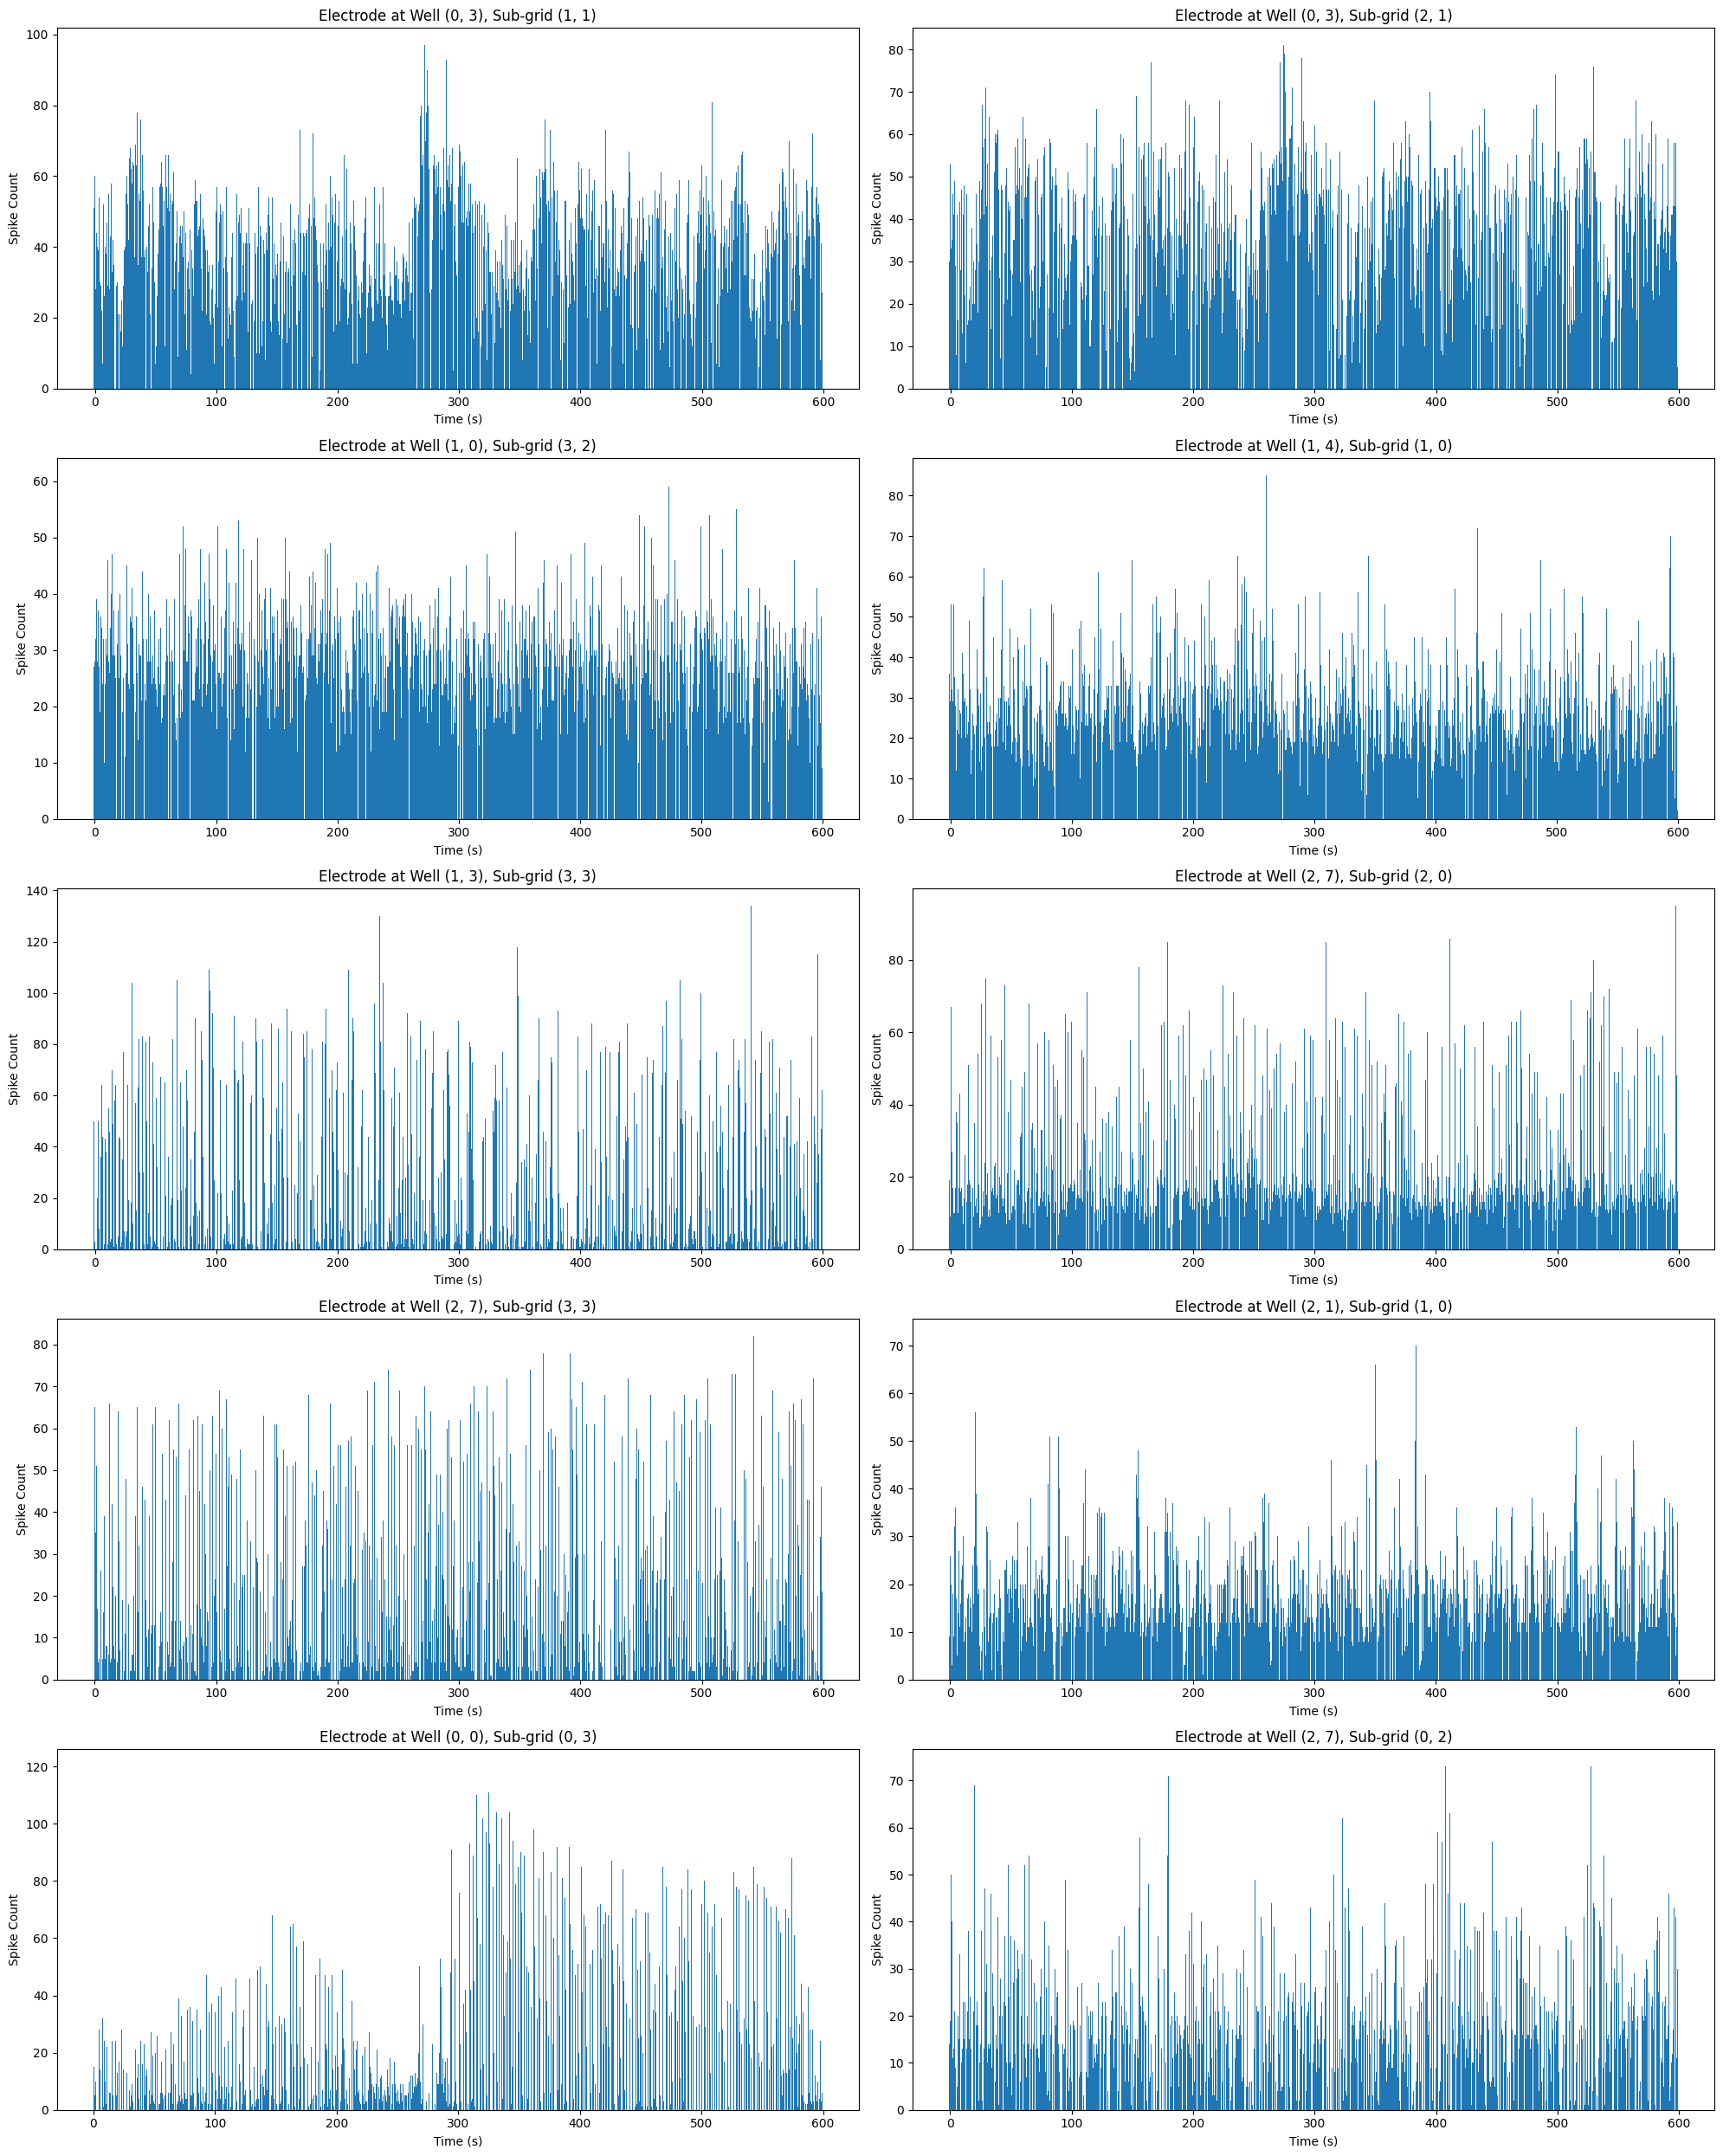

In [10]:
#all electrodes (sorted by most active)
find_and_plot_10_active_spike_windows(.5)

In [11]:
def find_and_plot_active_spike_windows(window_size):
    # Initialize a list to store spike counts and their positions
    spike_counts = []
    
    # Loop through each well and electrode
    for row in range(6):
        for col in range(8):
            for i in range(4):
                for j in range(4):
                    # Check if the electrode has data and is not empty
                    if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                        # Get the spike times for the electrode
                        spike_times = spike_times_array[row, col, i, j][0]
                        # Count the number of spikes and store with position
                        spike_counts.append((len(spike_times), (row, col, i, j)))
    
    # Filter out electrodes with 0 spikes
    spike_counts = [sc for sc in spike_counts if sc[0] > 0]
    
    # Sort electrodes by spike count
    spike_counts.sort(reverse=True, key=lambda x: x[0])
    
    # Find clusters of active time windows for filtered electrodes
    active_time_windows = {}
    
    for count, (row, col, i, j) in spike_counts:
        spike_times = spike_times_array[row, col, i, j][0]
        
        active_windows = []
    
        # Find clusters of spike times
        start_time = spike_times[0]
        end_time = start_time + window_size
        spike_count_in_window = 0
    
        for spike_time in spike_times:
            if spike_time <= end_time:
                spike_count_in_window += 1
            else:
                active_windows.append((start_time, end_time, spike_count_in_window))
                start_time = spike_time
                end_time = start_time + window_size
                spike_count_in_window = 1
    
        # Add the last window
        active_windows.append((start_time, end_time, spike_count_in_window))
    
        active_time_windows[(row, col, i, j)] = active_windows
    
    # Plot the results
    num_plots = len(active_time_windows)
    fig, axes = plt.subplots((num_plots + 1) // 2, 2, figsize=(20, num_plots * 2))  # Adjust figure size accordingly
    axes = axes.flatten()

    for idx, ((row, col, i, j), windows) in enumerate(active_time_windows.items()):
        window_starts = [start_time for start_time, end_time, count in windows]
        spike_counts = [count for start_time, end_time, count in windows]
        
        axes[idx].bar(window_starts, spike_counts, width=window_size, align='edge')
        axes[idx].set_title(f'Electrode at Well ({row}, {col}), Sub-grid ({i}, {j})')
        axes[idx].set_xlabel('Time (s)')
        axes[idx].set_ylabel('Spike Count')
        #axes[idx].axhline(y=100, color='r', linestyle='--')
    
    # Hide any unused subplots
    for ax in axes[num_plots:]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Usage
window_size = 100  # Define your window size
find_and_plot_active_spike_windows(window_size)


In [12]:
find_and_plot_active_spike_windows(.5)

## Spike times by well

In [22]:
np.ndim(spike_times_array)

4

In [49]:
spike_times_array[0][0][0]

array([array([[-3.8800000e-02,  1.3760000e-02,  3.7760000e-02, ...,
                5.9921800e+02,  5.9922448e+02,  5.9924184e+02]])   ,
       array([], shape=(0, 0), dtype=uint8),
       array([[-3.8496000e-01, -2.1744000e-01, -2.4480000e-02, ...,
                5.9890416e+02,  5.9921032e+02,  5.9924344e+02]])   ,
       array([[-2.9600000e-03,  1.2800000e-02,  2.0240000e-02, ...,
                5.9923984e+02,  5.9924272e+02,  5.9924704e+02]])   ],
      dtype=object)

In [23]:
spike_times_array[0][0][0][0]

array([[-3.8800000e-02,  1.3760000e-02,  3.7760000e-02, ...,
         5.9921800e+02,  5.9922448e+02,  5.9924184e+02]])

In [43]:
len(spike_times_array[0][0][0][0])

1

In [36]:
len(spike_times_array[0][0][0][0][0])

7305

In [29]:
spike_times_array[0][0][0][0][0]

array([-3.8800000e-02,  1.3760000e-02,  3.7760000e-02, ...,
        5.9921800e+02,  5.9922448e+02,  5.9924184e+02])

In [26]:
spike_times_array[0][0][0][0][0][0]

-0.0388

In [37]:
total_num_spikes = 0;
for row in range(6):
    for col in range(8):
        for i in range(4):
            for j in range(4):
                if(len(spike_times_array[row][col][i][j]) >0):
                    total_num_spikes += len(spike_times_array[row][col][i][j][0])

print(total_num_spikes)

730930


In [9]:
spike_times_by_well = np.empty((6, 8), dtype=object)
for row in range(6):
    for col in range(8):
        # empty list to collect spike times for the current well
        well_spike_times = []
        
        for i in range(4):
            for j in range(4):
                # Check if the entry is not empty and is not a zero-dimensional array
                if spike_times_array[row][col][i][j].size > 0:
                    if isinstance(spike_times_array[row][col][i][j][0], np.ndarray):
                        well_spike_times.extend(spike_times_array[row][col][i][j][0])
                    else:
                        # If they are scalars, append them to the list
                        well_spike_times.append(spike_times_array[row][col][i][j][0])
        
        spike_times_by_well[row, col] = np.sort(np.array(well_spike_times))

# Now spike_times_by_well is a 6x8 array where each entry contains a sorted array of spike times for that well

In [74]:
spike_times_by_well[1, 0][35092]

599.18832

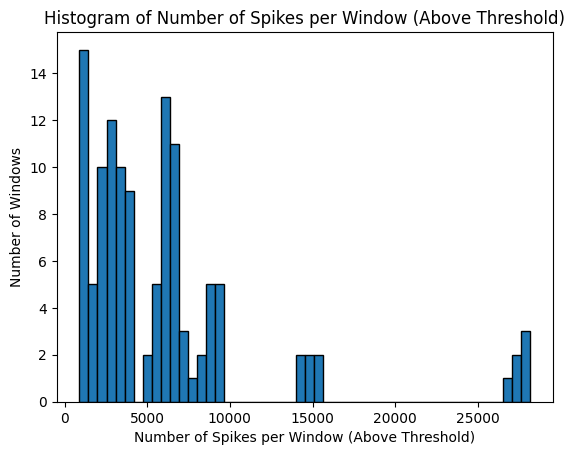

In [10]:
#window size and time range (e.g., 100s windows)
window_size = 100  # seconds
num_windows = 6    # 6 windows
threshold = 300     # Set a threshold for spikes per window

# Initialize arrays to store results
spikes_per_window = np.zeros((6, 8, num_windows))
binary_spikes_per_window = np.zeros((6, 8, num_windows))

# Process each well to calculate spikes per window and apply threshold
for row in range(6):
    for col in range(8):
        if spike_times_by_well[row, col].size > 0:
            spike_times = spike_times_by_well[row, col]
            # Create windows and count spikes per window
            for w in range(num_windows):
                start_time = w * window_size
                end_time = (w + 1) * window_size
                spikes_per_window[row, col, w] = np.sum((spike_times >= start_time) & (spike_times < end_time))
            
            # Apply threshold to create binary array
            binary_spikes_per_window[row, col] = spikes_per_window[row, col] > threshold

flattened_spikes = spikes_per_window.flatten()
flattened_binary_flags = binary_spikes_per_window.flatten()

# Filter the spikes that are above the threshold
spikes_above_threshold = flattened_spikes[flattened_binary_flags == 1]

# Plot the histogram of spikes per window for those above the threshold
plt.hist(spikes_above_threshold, bins=50, edgecolor='black')
plt.xlabel('Number of Spikes per Window (Above Threshold)')
plt.ylabel('Number of Windows')
plt.title('Histogram of Number of Spikes per Window (Above Threshold)')
plt.show()
# binary_spikes_per_window is now a 6x8x6 array where each entry is 0 or 1 based on the threshold


In [14]:
#naming convention window_time-activity_threshold
with open(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\spikes_100-300.pkl", 'wb') as f:
    # You can save spikes_per_window or binary_activity or both
    pkl.dump({
        'spikes_per_window': spikes_per_window,
        'binary_activity': binary_spikes_per_window
    }, f)

print("Data saved to 'spikes_100-300.pkl'")

Data saved to 'spikes_100:300.pkl'


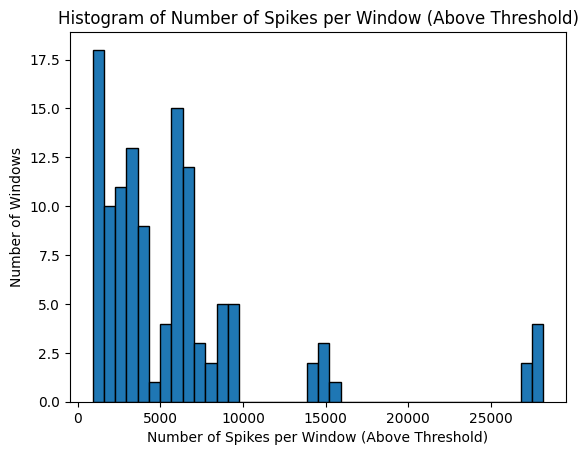

In [15]:
#window size and time range (e.g., 100s windows)
window_size = 100  # seconds
num_windows = 6    # 6 windows
threshold = 500     # Set a threshold for spikes per window

# Initialize arrays to store results
spikes_per_window = np.zeros((6, 8, num_windows))
binary_spikes_per_window = np.zeros((6, 8, num_windows))

# Process each well to calculate spikes per window and apply threshold
for row in range(6):
    for col in range(8):
        if spike_times_by_well[row, col].size > 0:
            spike_times = spike_times_by_well[row, col]
            # Create windows and count spikes per window
            for w in range(num_windows):
                start_time = w * window_size
                end_time = (w + 1) * window_size
                spikes_per_window[row, col, w] = np.sum((spike_times >= start_time) & (spike_times < end_time))
            
            # Apply threshold to create binary array
            binary_spikes_per_window[row, col] = spikes_per_window[row, col] > threshold

flattened_spikes = spikes_per_window.flatten()
flattened_binary_flags = binary_spikes_per_window.flatten()

# Filter the spikes that are above the threshold
spikes_above_threshold = flattened_spikes[flattened_binary_flags == 1]

# Plot the histogram of spikes per window for those above the threshold
plt.hist(spikes_above_threshold, bins=40, edgecolor='black')
plt.xlabel('Number of Spikes per Window (Above Threshold)')
plt.ylabel('Number of Windows')
plt.title('Histogram of Number of Spikes per Window (Above Threshold)')
plt.show()
# binary_spikes_per_window is now a 6x8x6 array where each entry is 0 or 1 based on the threshold


In [16]:
#naming convention window_time-activity_threshold
with open(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\spikes_100-500.pkl", 'wb') as f:
    # You can save spikes_per_window or binary_activity or both
    pkl.dump({
        'spikes_per_window': spikes_per_window,
        'binary_activity': binary_spikes_per_window
    }, f)

print("Data saved to 'spikes_100-500.pkl'")

Data saved to 'spikes_100-500.pkl'


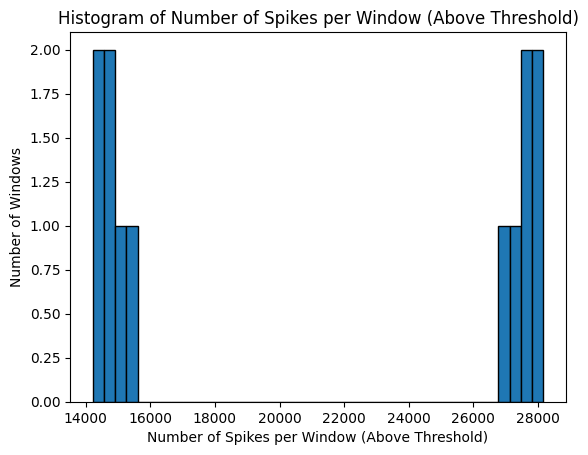

In [21]:
#window size and time range (e.g., 100s windows)
window_size = 100  # seconds
num_windows = 6    # 6 windows
threshold = 10000     # Set a threshold for spikes per window

# Initialize arrays to store results
spikes_per_window = np.zeros((6, 8, num_windows))
binary_spikes_per_window = np.zeros((6, 8, num_windows))

# Process each well to calculate spikes per window and apply threshold
for row in range(6):
    for col in range(8):
        if spike_times_by_well[row, col].size > 0:
            spike_times = spike_times_by_well[row, col]
            # Create windows and count spikes per window
            for w in range(num_windows):
                start_time = w * window_size
                end_time = (w + 1) * window_size
                spikes_per_window[row, col, w] = np.sum((spike_times >= start_time) & (spike_times < end_time))
            
            # Apply threshold to create binary array
            binary_spikes_per_window[row, col] = spikes_per_window[row, col] > threshold

flattened_spikes = spikes_per_window.flatten()
flattened_binary_flags = binary_spikes_per_window.flatten()

# Filter the spikes that are above the threshold
spikes_above_threshold = flattened_spikes[flattened_binary_flags == 1]

# Plot the histogram of spikes per window for those above the threshold
plt.hist(spikes_above_threshold, bins=40, edgecolor='black')
plt.xlabel('Number of Spikes per Window (Above Threshold)')
plt.ylabel('Number of Windows')
plt.title('Histogram of Number of Spikes per Window (Above Threshold)')
plt.show()
# binary_spikes_per_window is now a 6x8x6 array where each entry is 0 or 1 based on the threshold


In [22]:
#naming convention window_time-activity_threshold
with open(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\spikes_100-10000.pkl", 'wb') as f:
    # You can save spikes_per_window or binary_activity or both
    pkl.dump({
        'spikes_per_window': spikes_per_window,
        'binary_activity': binary_spikes_per_window
    }, f)

print("Data saved to 'spikes_100-10000.pkl'")

Data saved to 'spikes_100-10000.pkl'


## Spike Histograms


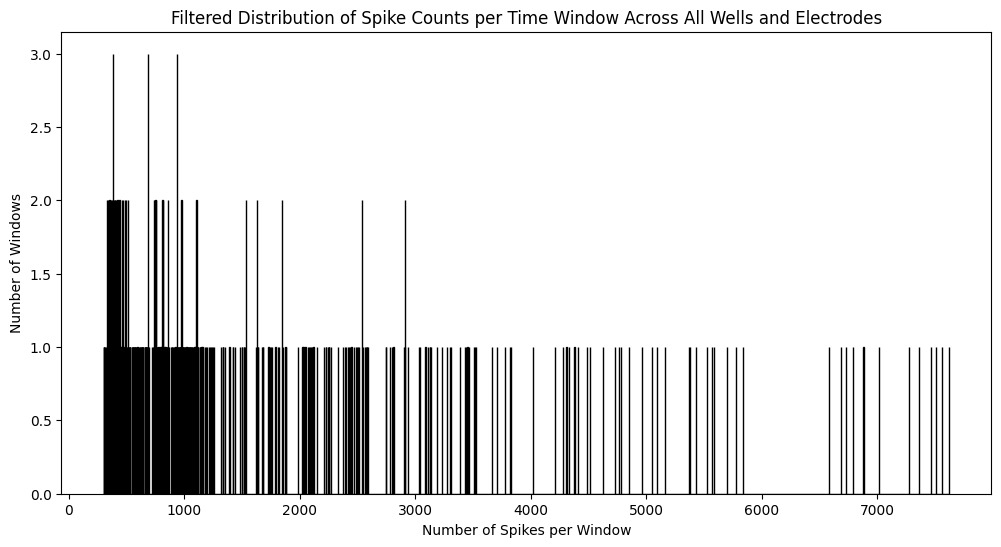

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming spike_times_array is already defined and populated

def find_and_plot_filtered_spike_count_distribution(window_size, min_spikes):
    # Initialize a list to store the spike count for each window
    spike_counts_per_window = []
    
    # Loop through each well and electrode
    for row in range(6):
        for col in range(8):
            for i in range(4):
                for j in range(4):
                    # Check if the electrode has data and is not empty
                    if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                        # Get the spike times for the electrode
                        spike_times = spike_times_array[row, col, i, j][0]
    
                        # Calculate spike counts for each time window
                        start_time = spike_times[0]
                        end_time = start_time + window_size
                        spike_count_in_window = 0
    
            for spike_time in spike_times:
                while spike_time > end_time:
                    # Move to the next time window
                    start_time = end_time
                    end_time = start_time + window_size
                    
                    # Add the spike count to the list if it meets the minimum spike criterion
                    if spike_count_in_window >= min_spikes:
                        spike_counts_per_window.append(spike_count_in_window)
                    
                    spike_count_in_window = 0
                    
                spike_count_in_window += 1
    
                        # Add the last window if it meets the minimum spike criterion
                        spike_counts_per_window.append(spike_count_in_window)
    

    
    # Plot the histogram of filtered spike counts per window
    plt.figure(figsize=(12, 6))
    plt.hist(spike_counts_per_window, bins=range(min_spikes, max(spike_counts_per_window) + 2), align='left', edgecolor='black')
    plt.title('Filtered Distribution of Spike Counts per Time Window Across All Wells')
    plt.xlabel('Number of Spikes per Window')
    plt.ylabel('Number of Windows')
    plt.show()

# Usage
window_size = 100  # Define your window size
min_spikes = 300    # Define the minimum number of spikes to include a window
find_and_plot_filtered_spike_count_distribution(window_size, min_spikes)


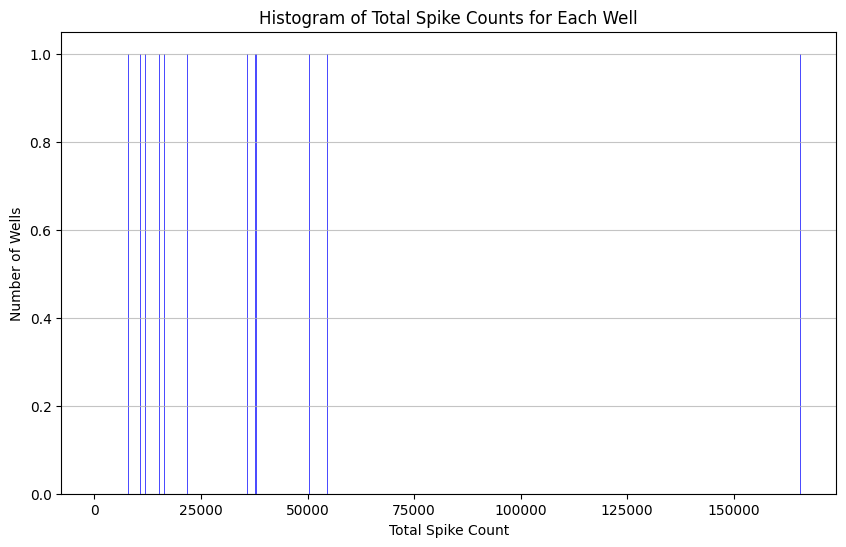

In [13]:
well_spike_counts = np.zeros((6, 8))

low_spikes = []

# Loop through each well and electrode
for row in range(6):
    for col in range(8):
        for i in range(4):
            for j in range(4):
                # Check if the electrode has data and is not empty
                if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                    # Get the spike times for the electrode
                    spike_times = spike_times_array[row, col, i, j][0]
                    # Aggregate the spike counts for the well
                    if len(spike_times) > 400:
                        well_spike_counts[row, col] += len(spike_times)
                    else:
                        low_spikes.append(f'Well {row},{col}; {i},{j} ')

                else:
                    low_spikes.append(f'Well-{row},{col};{i},{j}  ')

# Flatten the well_spike_counts array for histogram
flat_spike_counts = well_spike_counts.flatten()
flat_spike_counts = flat_spike_counts[flat_spike_counts > 0]

# Plot the histogram of total spike counts for each well
plt.figure(figsize=(10, 6))
plt.hist(flat_spike_counts, bins=1000, color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel('Total Spike Count')
plt.ylabel('Number of Wells')
#plt.xlim(0,1000)
plt.title('Histogram of Total Spike Counts for Each Well')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [14]:
print(len(low_spikes))
print("\n")
print(low_spikes)

663


['Well-0,0;0,1  ', 'Well-0,0;1,0  ', 'Well-0,0;1,2  ', 'Well-0,0;2,0  ', 'Well-0,0;2,1  ', 'Well-0,0;2,2  ', 'Well-0,0;2,3  ', 'Well-0,0;3,0  ', 'Well 0,0; 3,1 ', 'Well-0,0;3,2  ', 'Well-0,0;3,3  ', 'Well 0,1; 0,1 ', 'Well-0,1;0,2  ', 'Well 0,1; 1,0 ', 'Well 0,1; 1,1 ', 'Well 0,1; 1,2 ', 'Well-0,1;2,1  ', 'Well-0,1;2,2  ', 'Well-0,1;2,3  ', 'Well 0,1; 3,0 ', 'Well 0,1; 3,1 ', 'Well-0,1;3,2  ', 'Well-0,1;3,3  ', 'Well 0,2; 0,2 ', 'Well 0,2; 0,3 ', 'Well 0,2; 1,2 ', 'Well 0,2; 2,1 ', 'Well-0,2;2,2  ', 'Well 0,2; 2,3 ', 'Well-0,2;3,0  ', 'Well-0,2;3,3  ', 'Well 0,3; 0,3 ', 'Well-0,3;1,2  ', 'Well 0,3; 2,0 ', 'Well-0,3;2,2  ', 'Well-0,3;3,2  ', 'Well-0,4;0,0  ', 'Well-0,4;0,1  ', 'Well 0,4; 0,2 ', 'Well-0,4;0,3  ', 'Well 0,4; 1,1 ', 'Well 0,4; 1,2 ', 'Well 0,4; 1,3 ', 'Well 0,4; 2,1 ', 'Well 0,4; 2,2 ', 'Well 0,4; 3,1 ', 'Well 0,5; 0,0 ', 'Well-0,5;0,2  ', 'Well 0,5; 0,3 ', 'Well 0,5; 1,0 ', 'Well 0,5; 1,1 ', 'Well 0,5; 1,2 ', 'Well 0,5; 2,0 ', 'Well-0,5;2,1  ', 'Well-0,5;2,2  ', 'We

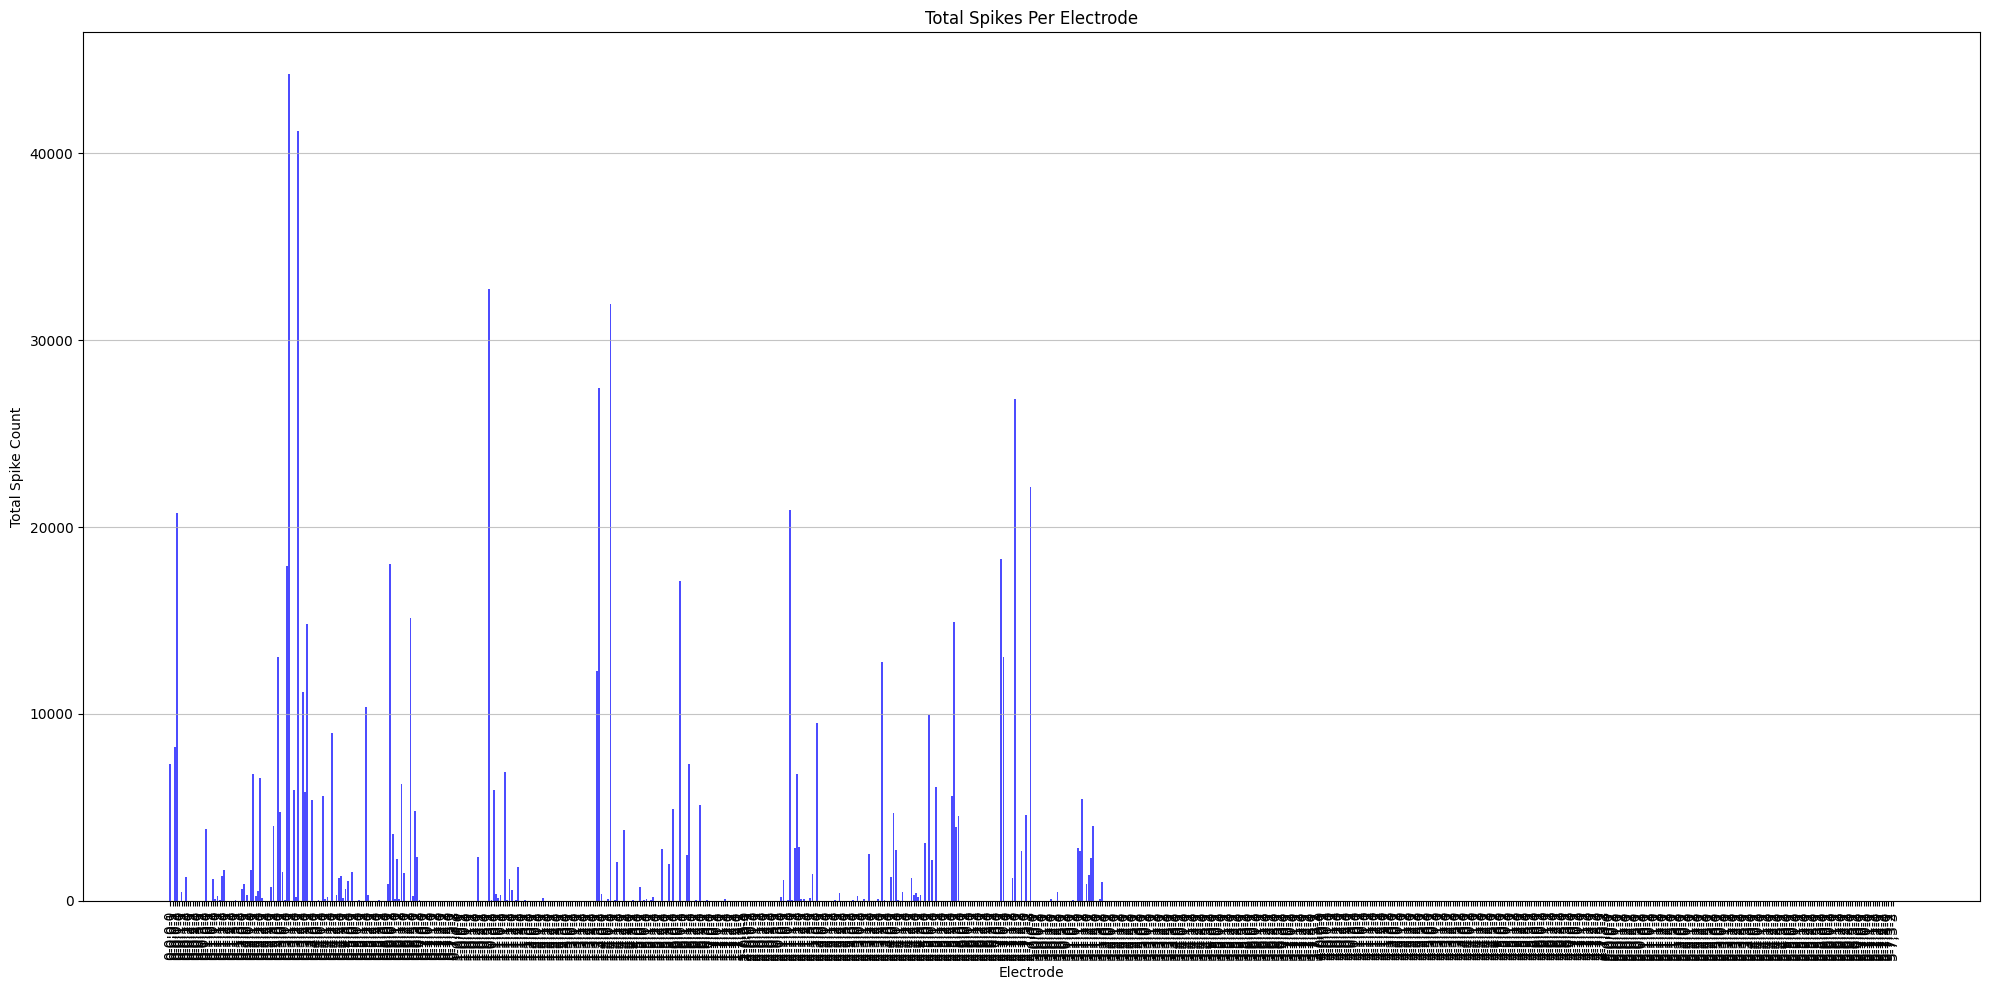

In [15]:
# Initialize a list to store spike counts for each electrode
electrode_spike_counts = []

# Loop through each well and electrode
for row in range(6):
    for col in range(8):
        for i in range(4):
            for j in range(4):
                # Check if the electrode has data and is not empty
                if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                    # Get the spike times for the electrode
                    spike_times = spike_times_array[row, col, i, j][0]
                    # Aggregate the spike counts for the electrode
                    electrode_spike_counts.append(len(spike_times))
                else:
                    # If no data, append 0 spikes
                    electrode_spike_counts.append(0)

# Create an array of electrode labels for the x-axis
electrode_labels = [f'{row}-{col};{i}-{j}' for row in range(6) for col in range(8) for i in range(4) for j in range(4)]

# Plot the total spikes per electrode
plt.figure(figsize=(20, 10))
plt.bar(electrode_labels, electrode_spike_counts, color='blue', alpha=0.7)
plt.xlabel('Electrode')
plt.ylabel('Total Spike Count')
plt.title('Total Spikes Per Electrode')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


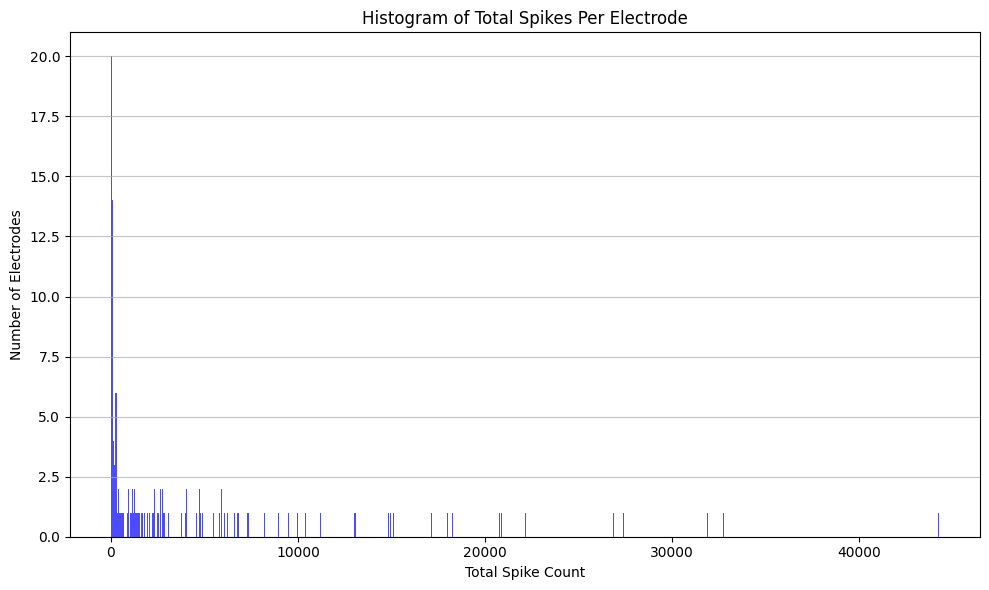

In [16]:
# Initialize a list to store spike counts for each electrode
electrode_spike_counts = []

# Loop through each well and electrode
for row in range(6):
    for col in range(8):
        for i in range(4):
            for j in range(4):
                # Check if the electrode has data and is not empty
                if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                    # Get the spike times for the electrode
                    spike_times = spike_times_array[row, col, i, j][0]
                    # Aggregate the spike counts for the electrode
                    if(len(spike_times) > 20):
                        electrode_spike_counts.append(len(spike_times))
                #else:
                    # If no data, append 0 spikes
                    #electrode_spike_counts.append(0)

# Plot a histogram of total spikes per electrode
plt.figure(figsize=(10, 6))
plt.hist(electrode_spike_counts, bins=1000, color='blue', alpha=0.7)
plt.xlabel('Total Spike Count')
plt.ylabel('Number of Electrodes')
plt.title('Histogram of Total Spikes Per Electrode')
#plt.xlim(0,20)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()